In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Generating synthetic data for demonstration
np.random.seed(42)
data_size = 20
square_footage = np.random.randint(1000, 3000, data_size)
bedrooms = np.random.randint(2, 5, data_size)
bathrooms = np.random.randint(1, 4, data_size)
prices = 200 * square_footage + 100 * bedrooms + 150 * bathrooms + np.random.normal(0, 1000, data_size)

# Creating a DataFrame
df = pd.DataFrame({'SquareFootage': square_footage, 'Bedrooms': bedrooms, 'Bathrooms': bathrooms, 'Price': prices})

# Splitting the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Creating feature and target DataFrames for training
X_train = train_data[['SquareFootage', 'Bedrooms', 'Bathrooms']]
y_train = train_data['Price']

# Creating feature and target DataFrames for testing (not used in training, for demonstration purposes only)
X_test = test_data[['SquareFootage', 'Bedrooms', 'Bathrooms']]
y_test = test_data['Price']

# Creating a linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Generating predictions on the test set (not used in training, for demonstration purposes only)
y_pred = model.predict(X_test)

# Creating a DataFrame with 20 rows for demonstration
demo_data = pd.DataFrame({'SquareFootage': np.random.randint(1000, 3000, 20),
                          'Bedrooms': np.random.randint(2, 5, 20),
                          'Bathrooms': np.random.randint(1, 4, 20)})

# Making predictions on the demo data
demo_predictions = model.predict(demo_data)

# Adding the predictions to the demo DataFrame
demo_data['PredictedPrice'] = demo_predictions

# Displaying the DataFrame
print(demo_data)


    SquareFootage  Bedrooms  Bathrooms  PredictedPrice
0            2748         2          3   549656.170974
1            1719         2          2   343841.054225
2            2772         4          1   555115.051033
3            1337         4          3   269381.074196
4            1878         4          2   377010.506610
5            2076         2          3   415493.918084
6            1791         4          3   360020.453381
7            2945         4          1   589653.845304
8            1216         2          3   243798.177779
9            1763         4          1   353672.025488
10           1187         2          3   238008.437698
11           1379         3          2   276674.195466
12           1492         4          3   300326.236693
13           2064         3          1   413052.682071
14           2180         2          1   435498.789866
15           1014         4          2   204516.181466
16           2836         2          3   567225.037424
17        

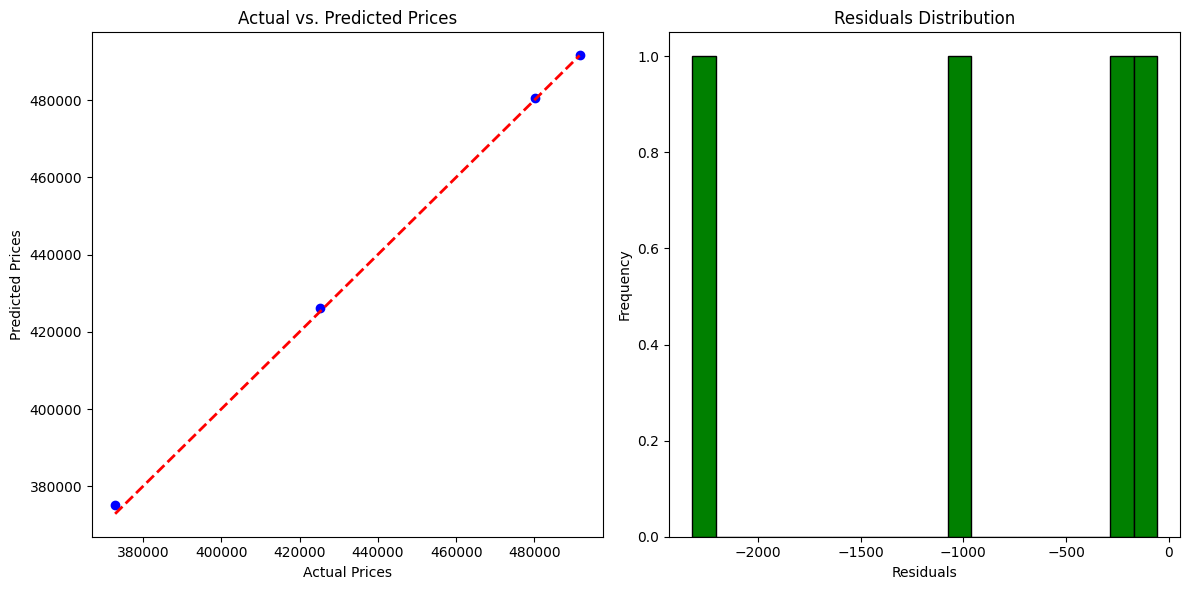

Mean Absolute Error (MAE): 892.31
Root Mean Squared Error (RMSE): 1265.43
R-squared (R2): 1.00


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluating the model on the test set
y_pred_test = model.predict(X_test)

# Computing evaluation metrics
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)

# Visualizing the predictions on the test set
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_test, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

# Visualizing the residuals
residuals = y_test - y_pred_test
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=20, color='green', edgecolor='black')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Displaying evaluation metrics
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')
